In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
px = train_set_x_orig.shape[1]

In [3]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1 ).T # (a,b,c,d)->(b*c*d,a)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1 ).T
#train_set_x_flatten.shape
#train_set_x_orig.shape[-1]

In [4]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [5]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [6]:
def initialization(dim):
    w = np.zeros([dim, 1], dtype = float)
    b = 0.0
    return w, b

In [7]:
def propogation(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
def optimization(w, b, X, Y, num_iterations, learning_rate, print_cost):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    for i in range(num_iterations):
        grads, cost = propogation(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
                
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [9]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else :
            Y_prediction[0,i] = 0
            
    return Y_prediction

In [10]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    w, b = initialization(X_train.shape[0])
    params, grads, costs = optimization(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [15]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=5000, learning_rate=0.0051, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.592919
Cost after iteration 200: 0.475439
Cost after iteration 300: 0.381517
Cost after iteration 400: 0.328229
Cost after iteration 500: 0.300131
Cost after iteration 600: 0.276842
Cost after iteration 700: 0.257098
Cost after iteration 800: 0.240083
Cost after iteration 900: 0.225227
Cost after iteration 1000: 0.212118
Cost after iteration 1100: 0.200449
Cost after iteration 1200: 0.189985
Cost after iteration 1300: 0.180541
Cost after iteration 1400: 0.171971
Cost after iteration 1500: 0.164156
Cost after iteration 1600: 0.156999
Cost after iteration 1700: 0.150419
Cost after iteration 1800: 0.144350
Cost after iteration 1900: 0.138733
Cost after iteration 2000: 0.133521
Cost after iteration 2100: 0.128671
Cost after iteration 2200: 0.124147
Cost after iteration 2300: 0.119918
Cost after iteration 2400: 0.115957
Cost after iteration 2500: 0.112238
Cost after iteration 2600: 0.108740
Cost after iteration 2700: 0.105446
Cost

y = 0, you predicted that it is a "non-cat" picture.


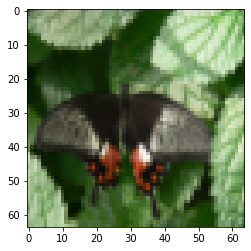

In [12]:
index = 27
plt.imshow(test_set_x[:, index].reshape((px, px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

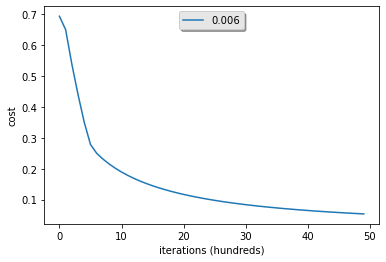

In [13]:
models = {}
lr = 0.006
models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=5000, learning_rate=lr, print_cost=False)
plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()